# Throw the coin! 

I first learned about Law of Small Number from a book written by Daniel Kahneman called Thinking Fast and Slow.
Daniel Kahneman and Amos Tversky study found that the law of small number is part of two stories about the working of our minds. 

"The exaggerated faith in small samples is only one example of a more general illusion—we pay more attention to the content of messages than to information about their reliability, and as a result end up with a view of the world around us that is simpler and more coherent than the data justify"

"Statistics produce many observations that appear to beg for causal explanations but do not lend themselves to such explanations. Many facts of the world are due to chance, including accidents of sampling. Causal explanations of chance events are inevitably wrong"

taken from the book Thinking Fast and Slow by Daniel Kahneman. 

Today, we are going to venture into Law of Small Numbers and Law of Large Numbers using the coin throwing example. Specifically, the law of large numbers denotes that as the size of a sample increases, it will generally become more representative of the population from which it is drawn, while the law of small numbers is the incorrect belief that small samples are likely to be highly representative of the populations from which they are drawn, similarly to large samples.

I am using python random library to throw coins. The outcome would be either head or tail, which we will use integer 0 and 1 to make it simpler. 0 for tail and 1 for head. Let's think about this intuitively at first, if we throw a coin the probability of getting a head or a tail is 50%. So if we thow one coin, the probability of getting head or tail is 0.50.

How about we throw the coin multiple times? The probability should be calculated as such:

probability = (number of favourable outcome / total number of possible outcome)

If we throw the coin 10 times, are we going to get 5 heads and 5 tails everytime?  The answer is no, we can get 4 heads and 6 tails,    or 6 heads and 4 tails or any possible outcome. It's random. The probability will vary from one experiment to the other.

To generalize it if we throw coins n times, the number of head outcomes is k. So the probability of the event is p=k/n. However we will see below that when n is small, we get random, incoherent values that do not follow the theoretical probability of coin throwing which is 0.5. Why? Law of small number. The smaller the the sample, the more random our outcome will be and diverge from the theoretical value.

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [55]:
# generate random number between 0 and 1.
# 0 for tail and 1 for head

def throw_coin():
    return random.randint(0,1)

throw_coin()

1

Text(0, 0.5, 'The probability of tosses landing on head(or tail)')

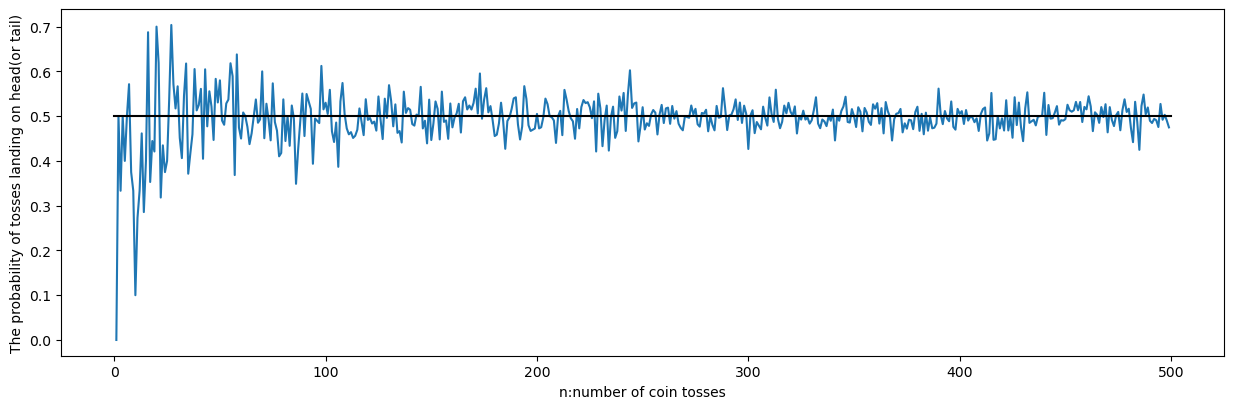

In [75]:
# desired_outcome:  desired outcome of one event ( for below 1 for head )
# throw_count: number of throw per one event (for below only 1 throw)  
#return the number of desired outcome for an event

def coin(desired_outcome,throw_count):
    result = 0
    for i in range(throw_count):
        if throw_coin() == desired_outcome:
            result = result + 1
    return result

#repeat the event multiple times
#number_of_trials, n : number of events made (for below 1,2,3....500 times) 
#data : the number of desired outcome for all events, k


def search_prob(numbers_of_trials):
    outcome = []
    for j in range(numbers_of_trials):
        outcome.append(coin(1,1))
        
    data = [ x for x in outcome if x == 1] #this follow binomial distribution
    return (len(data)/ numbers_of_trials)

trials = np.arange(1,500,1)
probabilities = []
for trial in trials:
    probabilities.append(search_prob(trial))
    
plt.figure(figsize=(15,4.5))  
plt.plot(trials,probabilities)
plt.plot([0, 500], [0.5, 0.5], 'k-')
plt.xlabel('n:number of coin tosses')
plt.ylabel('The probability of tosses landing on head(or tail)')

Explanation: The gragh x-axis is the number of coin tosses made. Its y-axis is the probability of tosses landing on either head or tail. The probability is calculated as such: 

probability = (number of favourable outcome / total number of possible outcome)

As the number of coin tosses increase we can see that the probability converge at 0.5 which is theoretically true, notice that after 100 tosses the probabality range become smaller. When we go as far as 500 times coin tosses, we can see its range become smaller, ie its deviation become smaller. This is the law of large number: as the number of sample increase, it will generally become more representative of the population from which it is drawn.